<a href="https://colab.research.google.com/github/chandini2595/CMPE255_Assignment4/blob/main/Handwritten_Digit_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition with CNN
This notebook implements a CNN for handwritten digit recognition using the MNIST-like dataset. It follows the CRISP-DM methodology.

In [1]:

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Step 1: Data Understanding
Load the dataset and visualize a sample image.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


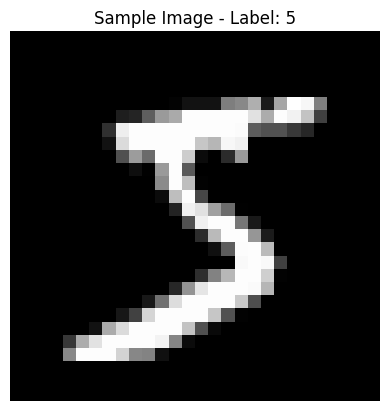

In [2]:

# Load the dataset (assuming you have loaded the MNIST dataset or similar)
from tensorflow.keras.datasets import mnist

# Load the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the data to include a channel dimension (grayscale)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255

# Display a sample image
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f'Sample Image - Label: {train_labels[0]}')
plt.axis('off')
plt.show()


## Step 2: Data Preparation
Normalize the images and reshape them for input into the CNN model.

In [9]:

# Data is already normalized in the range [0, 1] and reshaped to (28, 28, 1)
print('Training data shape:', train_images.shape)
print('Test data shape:', test_images.shape)


Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


## Step 3: Data Augmentation
Apply data augmentation to improve model generalization.

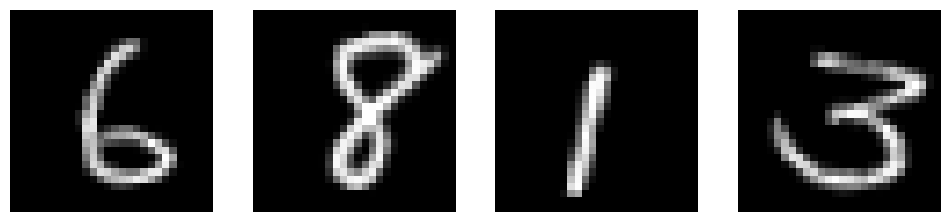

In [4]:

# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the data augmentation generator to the training data
datagen.fit(train_images)

# Visualize augmented images
augmented_images, _ = next(datagen.flow(train_images, train_labels, batch_size=4))

# Plot augmented images
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axs[i].imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    axs[i].axis('off')
plt.show()


## Step 4: Model Implementation
Build and compile the CNN model.

In [5]:

# Initialize the model
model = Sequential()

# Add layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Model Training
Train the model on the training dataset.

In [6]:

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 115s 56ms/step - accuracy: 0.7394 - loss: 0.7848 - val_accuracy: 0.9698 - val_loss: 0.0954
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 52ms/step - accuracy: 0.9445 - loss: 0.1877 - val_accuracy: 0.9813 - val_loss: 0.0598
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 52ms/step - accuracy: 0.9572 - loss: 0.1468 - val_accuracy: 0.9836 - val_loss: 0.0479
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9634 - loss: 0.1238 - val_accuracy: 0.9839 - val_loss: 0.0561
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 51ms/step - accuracy: 0.9672 - loss: 0.1097 - val_accuracy: 0.9854 - val_loss: 0.0459
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 50ms/step - accuracy: 0.9715 - loss: 0.0999 - val_accuracy: 0.9876 - val_loss: 0.0426
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.9735 - loss: 0.0869 - val_accuracy: 0.9843 - val_loss: 0.0476
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 48ms/step - accuracy: 0.9759 - loss:

## Step 6: Model Evaluation
Evaluate the model on the test data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9861 - loss: 0.0483
Test Accuracy: 0.9884
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


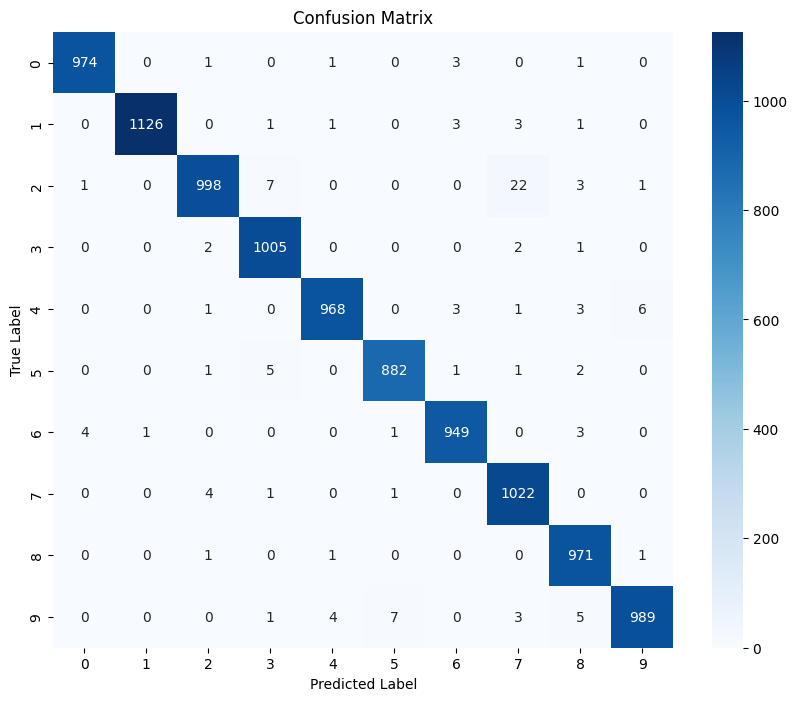

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.97      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [7]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate a confusion matrix
y_pred = np.argmax(model.predict(test_images), axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print(classification_report(test_labels, y_pred))


## Step 7: Save and Deploy the Model
Save the trained model for future use.

In [8]:

# Save the trained model to a file
model.save("digit_recognition_cnn.h5")
print("Model saved as digit_recognition_cnn.h5")


Model saved as digit_recognition_cnn.h5
